# Regression Linéaire

#### *Fonction linéaire des variables explicatives pour une instance/observation*

$y_i = \beta_{0} + \sum \limits _{j=1} ^{p} x_{i,j}\beta_{j} + \epsilon_{i} $

- $p$ :  nombre de variables/colonnes 
- $x_{i,j}$ : $j^{ème}$ variable de l'instance $x_i$
- $\beta_j$ : $j^{ème}$ paramètre du model
- $\epsilon_{i}$ terme d'erreur aléatoire

#### *Notation vectorielle*

$y_i = h_{\boldsymbol{\beta}}(\textbf{x}_i) + \epsilon_{i} = \boldsymbol{\beta} . \textbf{x}_i + \epsilon_{i}$

- $\boldsymbol{\beta}$ : vecteur des paramètres/coefficients $\boldsymbol{\beta} = (\beta_0 , ... , \beta_p)$
- $\textbf{x}_i$ : vecteur des variables de l'instance $\textbf{x}_i = (1, x_{i,1} , ..., x_{i,p})$ 
- $\boldsymbol{\beta} . \textbf{x} $ : produit scalaire des 2 vecteurs
- $h_{\boldsymbol{\beta}}$ :  fonction hypothèse 

#### *Notation matricielle*

$\textbf{y}_{n×1} = \boldsymbol{\beta}_{(p+1)×1} . \textbf{X}_{n×(p+1)} + \boldsymbol{\epsilon}_{n×1}$

Avec : $ \textbf{y} = \begin{bmatrix} y_0 \\[0.3em] y_1 \\[0.3em] \vdots \\[0.3em] y_p \end{bmatrix}, 
\textbf{X} = \begin{bmatrix} 1 & x_{11} & \cdots & x_{1p} \\[0.3em] 1 & x_{21} & \cdots & x_{2p} \\[0.3em] \vdots & \vdots & \ddots & \vdots \\[0.3em] 1 & x_{n2} & \cdots & x_{np} \end{bmatrix}, 
\boldsymbol{\beta} = \begin{bmatrix} \beta_0 \\[0.3em] \beta_1 \\[0.3em] \vdots \\[0.3em] \beta_p \end{bmatrix}, 
\boldsymbol{\epsilon} = \begin{bmatrix} \epsilon_0 \\[0.3em] \epsilon_1 \\[0.3em] \vdots \\[0.3em] \epsilon_p \end{bmatrix}, 
n =$ le nombre d'observations/instances/lignes

##### *Fonction de coût*

Pour une observation on a : $\hat{y_i} = h_{\boldsymbol{\beta}}(\textbf{x}_i)$ avec $\hat{y_i}$ la valeur prédite \
De même on a $\hat{\textbf{y}} = h_{\boldsymbol{\beta}}(\textbf{X})$ la résultante matricielle


Nous pouvons mesurer la précision de $\hat{\textbf{y}}$ en utilisant une fonction de coût.\
Dans les modèles de régression, une mesure couramment utilisée est l'erreur quadratique moyenne (MSE en anglais : Mean Squared Error), donnée par la formule suivante : \
$MSE(\textbf{X}, h) =  \cfrac{1}{n}\sum \limits _{i=1} ^{n} (y_i - \hat{y_i})^2 =  \cfrac{1}{n}\sum \limits _{i=1} ^{n} (y_i - \boldsymbol{\beta}^T . \textbf{x}_i)^2$

## *Estimation des coefficients de regression $\boldsymbol{\beta}$  via la méthode des moindre carrés*

Nous voulons trouver $\boldsymbol{\hat{\beta}}$ qui minimise la fonction de coût MSE. 




Si $\textbf{X}^T\textbf{X}$ est inversible, on a le vecteur des paramètres approximés qui vaut : $\boldsymbol{\hat{\beta}}= (\textbf{X}^T\textbf{X})^{-1}\textbf{X}^T\textbf{y}$

Certaines situations comme $n<p$ ou des variables fortement corrélés entre elles font qu'une telle matrice n'est pas inversible.\
 Dans ce cas, il est possible de calculer $\boldsymbol{\hat{\beta}}= \textbf{X}^+\textbf{y}$ avec $\textbf{X}^+$ la matrice pseudo inverse de Moore-Penrose.\
 Cette approche est aussi plus rapide à calculer et est en pratique largement utilisé.

#### *Complexité*

Avec $n$ le nombre d'observations et $p$ le nombre de variables, on obtient les complexités suivantes : 
- complexité temporelle d'apprentissage : $O(n*p^2 + p^3)$ Celle-ci se résumant a inverser la matrice $\textbf{X}^T\textbf{X}$ 
- complexité spatiale : $O(p)$
- complexité temporelle de prédiction d'un set de test : $O(p)$


### Implémentation

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, FloatSlider, IntSlider
from sklearn.linear_model import LinearRegression

#### Génération d'un jeu de données linéaire à 2 dimensions

In [2]:
np.random.seed(20)
X = 2 * np.random.rand(100, 1)
y = 6.4 - 5.2 * X + np.random.randn(100, 1)

Cette fonction a pour paramètres $\beta_0 = 6.4$ et $\beta_1 = -5.2$

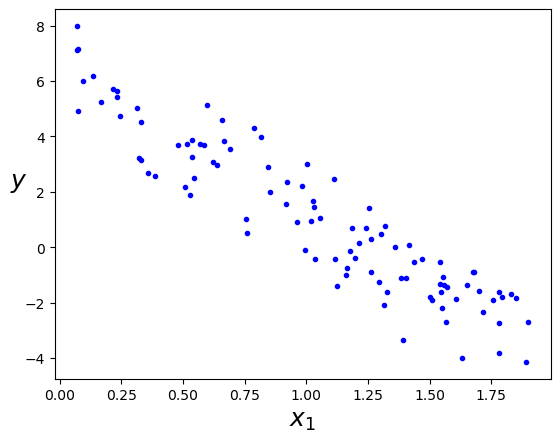

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#### Calcul des coefficients ${\beta}$

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # On rajoute x0 = 1 pour chaque observations

# Via inversion de matrice classique
beta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
beta_best

array([[ 6.2115615 ],
       [-4.96107648]])

In [5]:
# Via matrice pseudo-inverse
beta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) 
beta_best_svd

array([[ 6.2115615 ],
       [-4.96107648]])

In [6]:
# Via sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([6.2115615]), array([[-4.96107648]]))

Malgré le bruit gaussien rajouté, on retrouve des valeurs de coefficients similaires a ceux attendus. \
Enfin pour effectuer des predictions de nouvelles observations il suffit de créer un vecteur et de faire le produit avec la matrice $X$

In [29]:
# Prédiction du point 0 et 1
X_new = np.array([[0], [1]]) 
X_new_b = np.c_[np.ones((2, 1)), X_new]  # On rajoute x0 = 1 pour chaque observations
y_predict = X_new_b.dot(beta_best)
y_predict

array([[6.2115615 ],
       [1.25048502]])

#### Animation interactive 

Equation de la forme $y = ax+ b $ avec comme paramètres interactifs : $a$, $b$,  et le bruit

In [7]:
def generate_data(a, b, noise_scale, num_points):
    x = np.linspace(-10, 10, num_points)
    y = a * x + b + np.random.normal(0, noise_scale, num_points)
    return x, y

def update_plot(a, b, noise_scale):
    x, y = generate_data(a, b, noise_scale, num_points=100)
    
    # Fit the linear regression model
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    a_hat, b_hat = model.coef_[0], model.intercept_
    
    plt.scatter(x, y, s=10, color='blue', alpha=0.6)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    
    # Plot the estimated line
    x_line = np.linspace(-10, 10, 2)
    y_line = a_hat * x_line + b_hat
    plt.plot(x_line, y_line, color='red', linestyle='--')

    # Show the estimated parameters on the plot
    plt.text(0, 9, f'a estimé: {a_hat:.2f}', fontsize=10, color='green')
    plt.text(0, 8, f'b estimé: {b_hat:.2f}', fontsize=10, color='green')
    plt.grid()
    plt.show()

interact(update_plot, a=(-2.0, 2.0, 0.1), b=(-2.0, 2.0, 0.1), noise_scale=(0.1, 4.0, 0.2))

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

<function __main__.update_plot(a, b, noise_scale)>

## *Estimation des coefficients de regression $\boldsymbol{\beta}$  via la méthode de descente de gradient*

Lorsque le dataset comporte un très grand nombre de variables $p$, trouver les coefficients $\beta$ devient couteux en temps de calcul, généralement de $O(p^2)$ à $O(p^3)$.\
Il peut etre intéressant d'utiliser des algorithmes d'optimisations pour palier a ce problème. \
\
La descente de gradient utilise une approche itérative pour trouver les coefficients optimaux du modèle.\
L'algorithme commence avec une estimation initiale des coefficients, qui sont mis à jour à chaque itération en utilisant la dérivée par rapport à chaque coefficient de la fonction de coût. \
Le processus est répété jusqu'à ce que la fonction de coût atteigne un minimum local.





#### *Descente de gradient classique (Batch Gradient)*

On a l'équation de la dérivée partielle de MSE par rapport à $∂\beta_j$ suivante : $\cfrac{∂}{∂\beta_j} MSE(\boldsymbol{\beta}) = \cfrac{2}{n} \sum \limits _{i=1} ^{n} (\boldsymbol{\beta}^T \textbf{x}_i-y_i)x_{i,j}$  

Et le gradient suivant :  $∇MSE(\boldsymbol{\beta}) = \begin{bmatrix} \cfrac{∂}{∂\beta_0} MSE(\boldsymbol{\beta}) \\[0.3em] \cfrac{∂}{∂\beta_1} MSE(\boldsymbol{\beta}) \\[0.3em] \vdots \\[0.3em] \cfrac{∂}{∂\beta_p} MSE(\boldsymbol{\beta}) \end{bmatrix} = \cfrac{2}{n}\textbf{X}^T(\textbf{X}\boldsymbol{\beta} - \textbf{y})$ 

Au final on a le vecteur des paramètres qui vaudra pour chaque $k$ itérations : $\boldsymbol{\beta}^{k+1} = \boldsymbol{\beta^k} - \eta∇MSE(\boldsymbol{\beta})   $\
avec $\eta$ le taux d'apprentissage

#### *Descente de gradient Stochastique (SGD)*

Lorsque la matrice $X$ d'apprentissage comporte un nombre important d'observations, une technique permettant de réduire le temps de calcul au détriment\
de la qualité de convergence est la descente de gradient stochastique. On remplace dans notre apprentissage la matrice $X$ par une instance aléatoire $\textbf{x}_r$ pour chaque itération\
Ce qui donne $MSE = (y_r - \boldsymbol{\beta}^T . \textbf{x}_r)^2 = (y_r - \hat{y_r})^2 $\
Les étapes suivantes restent les même que la descente de gradient classique avec le calcul de $∇MSE(\boldsymbol{\beta})$ puis de $\boldsymbol{\beta}^{k+1}$


#### *Mini batch gradient*

Dans la même optique, le mini batch prends cette fois-ci un sous ensemble aléatoire $A\subset{X}$ pour chaque itérations.\
Les étapes suivantes restent les même que la descente de gradient classique avec le calcul de $∇MSE(\boldsymbol{\beta})$ puis de $\boldsymbol{\beta}^{k+1}$ 

#### *Complexité*

Avec $n$ le nombre d'observations et $p$ le nombre de variables, k le nombre d'itération,  on obtient les complexités suivantes :
 
 Batch Gradient
- complexité temporelle d'apprentissage : $ O(knp) ∼O(kn^2)$ 
- complexité spatiale : $O(p)$
- complexité temporelle de prédiction d'un set de test : $O(p)$


 SGD
- complexité temporelle d'apprentissage : $O(kp)$ 
- complexité spatiale : $O(p)$
- complexité temporelle de prédiction d'un set de test : $O(p)$

 Mini batch Gradient
- complexité temporelle d'apprentissage : $O(kn_1p)$ avec $n_1$ la taille du mini batch
- complexité spatiale : $O(p)$
- complexité temporelle de prédiction d'un set de test : $O(p)$

#### *Notes*

La descente de gradient est sensible à la différence d'échelle entre les variables. Il faut s'assurer de qu'elles soient normalisées/standardiseés (ou autre méthodes), \
sous peine de prendre plus de temps à converger.



Le taux d'apprentissage $\eta$ est un hyperparamètre du model. Son choix optimal peut varier en fonction de $X$ et il peut etre interessant de tester différentes combinaisons dans le cas du Batch Gradient.\
Cela peut se faire via l'utilisation d'un **grid_search** en utilisant un grand nombre d'itérations et en stoppant lorsque $∇MSE(\boldsymbol{\beta}) <\epsilon$ \
Pour le SGD et le mini batch, à cause du phénomène aléatoire de ces derniers, il est préconisé de commencer avec $\eta$ élevé puis de le diminuer au fur et à mesure pour améliorer la convergence.

### Implémentation

#### Descente de gradient classique

On reprends l'exemple précendent $\beta_0 = 6.4$ et $\beta_1 = -5.2$

In [8]:
def batch_gradient(X, y): 
    np.random.seed(20)

    eta = 0.1  # learning rate
    k_iterations = 1000
    X_a = np.c_[np.ones((len(X), 1)), X] # On rajoute x0 = 1 pour chaque observations
    n = len(X_a)
    beta_path_bgd = []

    beta_batch = np.random.randn(2,1)  # random initialization

    for iteration in range(k_iterations):
        gradients = 2/n * X_a.T.dot(X_a.dot(beta_batch) - y)
        beta_batch = beta_batch - eta * gradients
        beta_path_bgd.append(beta_batch)

    return beta_path_bgd

batch_gradient(X,y)[-1]

array([[ 6.2115615 ],
       [-4.96107648]])

#### Descente de gradient stochastique

In [9]:
def sgd(X, y): 
    np.random.seed(20)
    X_a = np.c_[np.ones((len(X), 1)), X] # On rajoute x0 = 1 pour chaque observations
    n = len(X_a)
    n_epochs = 50
    t0, t1 = 5, 50  # learning schedule hyperparameters
    beta_path_sgd = []

    def learning_schedule(t):
        return t0 / (t + t1)

    beta_sgd = np.random.randn(2,1)  # random initialization

    for epoch in range(n_epochs):
        for i in range(n):
            random_index = np.random.randint(n)
            xi = X_a[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(beta_sgd) - yi)
            eta = learning_schedule(epoch * n + i)
            beta_sgd = beta_sgd - eta * gradients
            beta_path_sgd.append(beta_sgd)

    return beta_path_sgd

sgd(X,y)[-1]

array([[ 6.15945708],
       [-4.92909127]])

#### Mini Batch Gradient

In [10]:
def mini_batch_gradient(X,y):
    np.random.seed(20)
    X_a = np.c_[np.ones((len(X), 1)), X] # On rajoute x0 = 1 pour chaque observations
    n = len(X_a)
    beta_path_mgd = []

    k_iterations = 50
    minibatch_size = 20

    beta = np.random.randn(2,1)  # random initialization

    t0, t1 = 200, 1000
    def learning_schedule(t):
        return t0 / (t + t1)

    t = 0
    for epoch in range(k_iterations):
        shuffled_indices = np.random.permutation(n)
        X_a_shuffled = X_a[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, n, minibatch_size):
            t += 1
            xi = X_a_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(beta) - yi)
            eta = learning_schedule(t)
            beta = beta - eta * gradients
            beta_path_mgd.append(beta)
            
    return beta_path_mgd

mini_batch_gradient(X,y)[-1]

array([[ 6.23793141],
       [-4.92077187]])

In [19]:
def generate_data(a, b, num_points):
    np.random.seed(20)
    x = 2 * np.random.rand(num_points, 1,)
    y = b + a* x + np.random.randn(num_points, 1)
    return x, y

def update_plot(a=2.5, b = 4.0, k = 200):
    x, y = generate_data(a, b, num_points=200)
    conv_points_gradient = batch_gradient(x,y)[:k] 
    conv_points_sgd = sgd(x,y)[:k] 
    conv_points_minibatch_gradient = mini_batch_gradient(x,y)[:k] 
    plt.figure(figsize=(15,5))

    plt.subplot(121)
    plt.plot(np.array(conv_points_gradient)[:,0], np.array(conv_points_gradient)[:,1], "r-s", linewidth=1, label="Batch")
    plt.plot(np.array(conv_points_sgd)[:,0], np.array(conv_points_sgd)[:,1], "b-o", linewidth=1, label="Stochastic")
    plt.plot(np.array(conv_points_minibatch_gradient)[:,0], np.array(conv_points_minibatch_gradient)[:,1], "g-+", linewidth=1, label="Mini Batch")
    plt.legend(loc="upper left", fontsize=12)
    plt.grid()
    plt.xlabel(r"b", fontsize=20)
    plt.ylabel(r"a", fontsize=20)

    plt.subplot(122)
    plt.xlim(-0.5, 2.5)
    plt.ylim(-4, 11)
    plt.grid()
    plt.scatter(x,y)
    x_line = np.linspace(-10, 10, 2)

    y_line = a * x_line + b
    y_gd = conv_points_gradient[k-1][0] + conv_points_gradient[k-1][1]*x_line
    y_sgd = conv_points_sgd[k-1][0] + conv_points_sgd[k-1][1]*x_line
    y_mgd = conv_points_minibatch_gradient[k-1][0] + conv_points_minibatch_gradient[k-1][1]*x_line
    plt.plot(x_line, y_line, color='red')
    plt.plot(x_line, y_sgd, color='red', linestyle='--')
    plt.plot(x_line, y_sgd, color='blue', linestyle='--')

    plt.show()
    

interact(update_plot, a=(-4.0, 4.0, 0.1), b=(-4.0, 4.0, 0.1), k=(1, 500, 1))

interactive(children=(FloatSlider(value=2.5, description='a', max=4.0, min=-4.0), FloatSlider(value=4.0, descr…

<function __main__.update_plot(a=2.5, b=4.0, k=200)>